In [10]:
%autosave 0
!python -V
import tensorflow as tf
from tensorflow import keras
tf.__version__

Autosave disabled
Python 3.9.19


'2.10.1'

In [11]:
model = keras.models.load_model('clothing-model.h5')

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from keras.applications.xception import preprocess_input


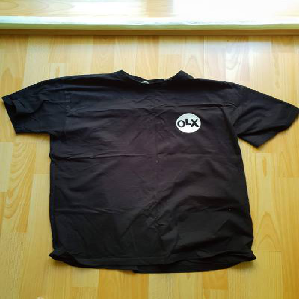

In [19]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname,target_size=(299, 299))
img

In [20]:

# Preprocessing the image
x = np.array(img)
# Turning this image into a batch of one image
X = np.array([x])
 
X = preprocess_input(X)
X.shape

(1, 299, 299, 3)

In [21]:
preds = model.predict(X)
preds

1/1 [==============================] - 1s 1s/step


array([[ 2.2854202, -2.7668118,  2.9345503, -1.2010168, -3.6673102,
         2.021257 , -4.1871705, -2.175655 , -3.5674613,  7.8782315]],
      dtype=float32)

In [22]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]
 
# Combining labels with actual prediction
dict(zip(classes, preds[0]))
 

{'dress': 2.2854202,
 'hat': -2.7668118,
 'longsleeve': 2.9345503,
 'outwear': -1.2010168,
 'pants': -3.6673102,
 'shirt': 2.021257,
 'shoes': -4.1871705,
 'shorts': -2.175655,
 'skirt': -3.5674613,
 't-shirt': 7.8782315}

In [23]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
 
tflite_model = converter.convert()
 
# Saving the model
with open('clothing-model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)
 
!ls

INFO:tensorflow:Assets written to: /tmp/tmpux0ufgld/assets


INFO:tensorflow:Assets written to: /tmp/tmpux0ufgld/assets
2024-06-17 23:42:56.914314: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2024-06-17 23:42:56.914372: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2024-06-17 23:42:56.916803: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpux0ufgld
2024-06-17 23:42:56.972466: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2024-06-17 23:42:56.972553: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpux0ufgld
2024-06-17 23:42:57.098361: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2024-06-17 23:42:57.129332: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2024-06-17 23:42:57.700293: I tensorflow/cc/saved_model/loader.cc:213] Running initializatio

clothing-dataset-small	       clothing-model.tflite  pants.jpg
clothing-dataset-small-master  deeplearning.ipynb     xception_v3_44_0.853.h5
clothing-model.h5	       deploying.ipynb


In [24]:
import tensorflow.lite as tflite
 
interpreter = tflite.Interpreter(model_path='clothing-model.tflite')
# Loading weights from the model to the memory
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [28]:
#interpreter.get_input_details()
#input_index = interpreter.get_input_details()[0]['index']
# Needing also index of the output
#interpreter.get_output_details()
interpreter.get_output_details()[0]['index']
# Output: 229
 
output_index = interpreter.get_output_details()[0]['index']

In [29]:
# Initializing the input of the interpreter with this X
interpreter.set_tensor(input_index, X)
 
# Invoking the computations in the neural network
interpreter.invoke()
 
# Results are in the output_index, so fetching the results...
preds = interpreter.get_tensor(output_index)
preds

array([[ 2.2854216, -2.766812 ,  2.9345486, -1.2010183, -3.6673129,
         2.0212553, -4.187169 , -2.1756563, -3.5674615,  7.878236 ]],
      dtype=float32)

In [30]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]
 
# Combining labels with actual prediction
dict(zip(classes, preds[0]))

{'dress': 2.2854216,
 'hat': -2.766812,
 'longsleeve': 2.9345486,
 'outwear': -1.2010183,
 'pants': -3.6673129,
 'shirt': 2.0212553,
 'shoes': -4.187169,
 'shorts': -2.1756563,
 'skirt': -3.5674615,
 't-shirt': 7.878236}

## Removing tensorflow dependency

In [31]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
tshirt = f'{path}/{name}'

tshirt

'./clothing-dataset-small/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'

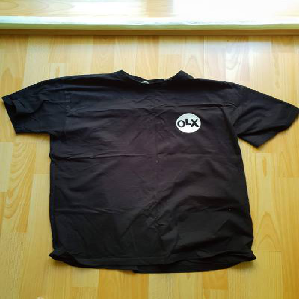

In [33]:
from PIL import Image
 
with Image.open(tshirt) as img:
    img = img.resize((299, 299), Image.NEAREST)
 
img

In [34]:
def preprocess_input(x):
    x /= 127.5
    x -= 1.
    return x

# Preprocessing the image --> we need to set dtype here 
x = np.array(img, dtype='float32')
 
# Turning this image into a batch of one image
X = np.array([x])
X = preprocess_input(X)
 
# Initializing the input of the interpreter with this X
interpreter.set_tensor(input_index, X)
 
# Invoking the computations in the neural network
interpreter.invoke()
 
# Results are in the output_index, so fetching the results...
preds = interpreter.get_tensor(output_index)
preds
 
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]
 
# Combining labels with actual prediction
dict(zip(classes, preds[0]))


{'dress': 2.2854216,
 'hat': -2.766812,
 'longsleeve': 2.9345486,
 'outwear': -1.2010183,
 'pants': -3.6673129,
 'shirt': 2.0212553,
 'shoes': -4.187169,
 'shorts': -2.1756563,
 'skirt': -3.5674615,
 't-shirt': 7.878236}

In [35]:
!pip install keras-image-helper

In [36]:
	
from keras_image_helper import create_preprocessor


In [37]:
preprocessor = create_preprocessor('xception', target_size=(299,299))
 
url = 'http://bit.ly/mlbookcamp-pants'
X = preprocessor.from_url(url)
 
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)
 
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]
 
# Combining labels with actual prediction
dict(zip(classes, preds[0]))


{'dress': -1.8682916,
 'hat': -4.7612457,
 'longsleeve': -2.316979,
 'outwear': -1.0625672,
 'pants': 9.8871565,
 'shirt': -2.8124275,
 'shoes': -3.666287,
 'shorts': 3.2003636,
 'skirt': -2.6023414,
 't-shirt': -4.8350444}

In [38]:
import tensorflow.lite as tflite
from keras_image_helper import create_preprocessor
 
interpreter = tflite.Interpreter(model_path='clothing-model.tflite')
interpreter.allocate_tensors()
 
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']
 
preprocessor = create_preprocessor('xception', target_size=(299, 299))
 
url = 'http://bit.ly/mlbookcamp-pants'
X = preprocessor.from_url(url)
 
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)
 
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]
 
dict(zip(classes, preds[0]))

{'dress': -1.8682916,
 'hat': -4.7612457,
 'longsleeve': -2.316979,
 'outwear': -1.0625672,
 'pants': 9.8871565,
 'shirt': -2.8124275,
 'shoes': -3.666287,
 'shorts': 3.2003636,
 'skirt': -2.6023414,
 't-shirt': -4.8350444}

In [39]:
!pip install tflite-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 9.5 MB/s eta 0:00:00a 0:00:01


In [45]:
!pip install tflite-runtime
import tflite_runtime.interpreter as tflite
from keras_image_helper import create_preprocessor

ImportError: generic_type: type "InterpreterWrapper" is already registered!

In [46]:
interpreter = tflite.Interpreter(model_path='clothing-model.tflite')
interpreter.allocate_tensors()
 
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']
 
preprocessor = create_preprocessor('xception', target_size=(299, 299))
 
url = 'http://bit.ly/mlbookcamp-pants'
X = preprocessor.from_url(url)
 
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)
 
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]
 
dict(zip(classes, preds[0]))

{'dress': -1.8682916,
 'hat': -4.7612457,
 'longsleeve': -2.316979,
 'outwear': -1.0625672,
 'pants': 9.8871565,
 'shirt': -2.8124275,
 'shoes': -3.666287,
 'shorts': 3.2003636,
 'skirt': -2.6023414,
 't-shirt': -4.8350444}